In [1]:
import cPickle
import numpy as np
import matplotlib.pyplot as plt

# PARAMS
log_dir = "/home/sforesti/avakas/scratch/sforestier001/logs/CogSci2017/2017-01-17_19-32-17-EXPLO-0.5"


filename = log_dir + '/results/vocal.pickle'
with open(filename, 'r') as f:
    data_vocal = cPickle.load(f)

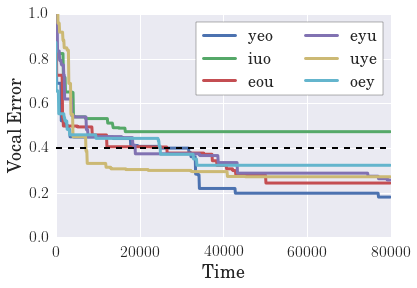

In [69]:
%matplotlib inline
import seaborn as sns
import numpy as np


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
n_trials = 500
n_iter = 80000
iter_ds = 100
trial_list = range(1,n_trials + 1) 
config_name = "RMB"

x = [iter_ds*i for i in range(n_iter/iter_ds)]

for trial in [166]:
    #human_sounds = data_vocal[config_name][trial]["human_sounds"]    
    human_sounds = ["yeo", "iuo", "eou", "eyu", "uye", "oey"]   # Sort for better color rendering 
    for hs in human_sounds:
        plt.plot(x, [data_vocal[config_name][trial]["errors"][i][hs] for i in range(n_iter/iter_ds)], label=hs, lw=3)
        
plt.ylim([0, 1.])       
plt.xlim([0, n_iter])  
plt.plot((0, n_iter), (0.4, 0.4), 'k--', lw=2)

legend = plt.legend(frameon=True, fontsize=16, ncol=2)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Vocal Error", fontsize=18)

#plt.xticks([0, 20000, 40000, 60000, 80000], ["$0$", r"$2\times10^4$", r"$4\times10^4$", r"$6\times10^4$", r"$8\times10^4$"], fontsize = 16)
plt.xticks([0, 20000, 40000, 60000, 80000], ["$0$", "$20000$", "$40000$", "$60000$", "$80000$"], fontsize = 16)
plt.yticks(fontsize = 16)

frame = legend.get_frame()
frame.set_facecolor('1.')
frame.set_edgecolor('0.')

plt.savefig('../figs/fig_vocal_errors_example.pdf', format='pdf', bbox_inches='tight')

In [48]:
for trial in trial_list:
    human_sounds = data_vocal[config_name][trial]["human_sounds"]    
    if data_vocal[config_name][trial]["errors"][-1][human_sounds[0]] > 0.4 or data_vocal[config_name][trial]["errors"][-1][human_sounds[1]] > 0.4 or data_vocal[config_name][trial]["errors"][-1][human_sounds[0]] > 0.4:
        min_hs = 0
        min_error = 1
        for i in range(6):
            if data_vocal[config_name][trial]["errors"][-1][human_sounds[i]] < min_error:
                min_error = data_vocal[config_name][trial]["errors"][-1][human_sounds[0]]
                min_hs = i
        if min_hs < 3:
            print trial

19
30
47
64
73
82
98
105
109
119
121
127
137
139
157
166
179
202
227
243
244
255
275


KeyError: 'human_sounds'

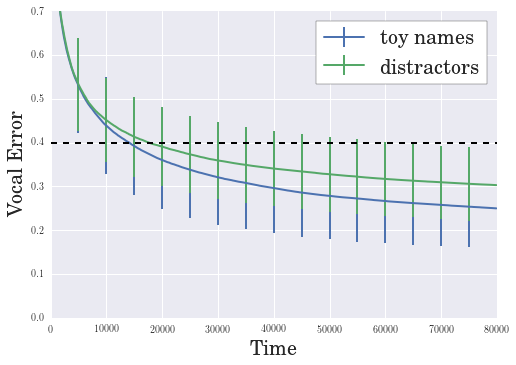

In [3]:
ee_list_s = []
ee_list_ns = []

for trial in trial_list:
    if data_vocal[config_name][trial].has_key("human_sounds"):
        human_sounds = data_vocal[config_name][trial]["human_sounds"]    
        for hs in human_sounds[:3]:
            ee_list_s += [[data_vocal[config_name][trial]["errors"][i][hs] for i in range(n_iter/iter_ds)]]

        for hs in human_sounds[3:]:
            ee_list_ns += [[data_vocal[config_name][trial]["errors"][i][hs] for i in range(n_iter/iter_ds)]]
        
        
x = [iter_ds*i for i in range(n_iter/iter_ds)]
plt.errorbar(x, np.mean(ee_list_s, axis=0)[:n_iter/iter_ds], np.std(ee_list_s, axis=0)[:n_iter/iter_ds], label="toy names", lw=2, errorevery=50)
plt.errorbar(x, np.mean(ee_list_ns, axis=0)[:n_iter/iter_ds], np.std(ee_list_ns, axis=0)[:n_iter/iter_ds], label="distractors", lw=2, errorevery=50)

plt.xlabel("Time", fontsize=20)
plt.ylabel("Vocal Error", fontsize=20)
plt.ylim([0, 0.7])       
plt.xlim([0, n_iter])  
plt.plot((0, n_iter), (0.4, 0.4), 'k--', lw=2)
legend=plt.legend(frameon=True, fontsize=20)
frame = legend.get_frame()
frame.set_facecolor('1.')
frame.set_edgecolor('0.')

583
563
Avg diff 0.0605169649579
Std 0.0527086938597 0.0570622849779


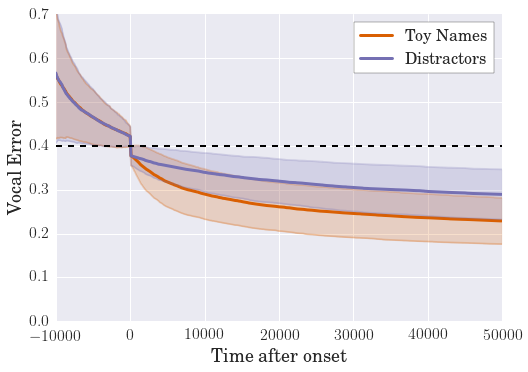

In [11]:
ta = 500
tb = 100
var="std"

import numpy as np
import seaborn as sns
import brewer2mpl
bmap = brewer2mpl.get_map('Dark2', 'qualitative', 4)
colors = bmap.mpl_colors

def time_limit(error_evolution):
    tl = len(error_evolution)-1
    while tl > 0 and error_evolution[tl] < 0.4:
        tl -= 1
    return tl
    
def synchro(ee_list):
    l = []
    for ee in ee_list:
        tl_ee = time_limit(ee)
        if tl_ee < n_iter/iter_ds-ta and tl_ee > tb:
            l += [ee[tl_ee-tb:tl_ee+ta]]
    return l

        
ee_s_synchro = synchro(ee_list_s)
ee_ns_synchro = synchro(ee_list_ns)
    
print len(ee_s_synchro)
print len(ee_ns_synchro)


x = [iter_ds*(i - tb) for i in range(ta+tb)]


if False:
    (_, caps, _) = plt.errorbar(x, np.mean(ee_s_synchro, axis=0), np.std(ee_s_synchro, axis=0), label="Toy Names", lw=3, color=colors[1], errorevery=50)
    for cap in caps:
        cap.set_markeredgewidth(2)
    (_, caps, _) = plt.errorbar(x, np.mean(ee_ns_synchro, axis=0), np.std(ee_ns_synchro, axis=0), label="Distractors", lw=3, color=colors[2], errorevery=50)
    for cap in caps:
        cap.set_markeredgewidth(2)
else:
    y = np.mean(ee_s_synchro, axis=0)
    error = np.std(ee_s_synchro, axis=0)
    plt.plot(x, y, label="Toy Names", lw=3, color=colors[1])
    plt.fill_between(x, y-error, y+error, color=colors[1], alpha=0.2)
    plt.plot(x, y+error, color=colors[1], alpha=0.25)
    plt.plot(x, y-error, color=colors[1], alpha=0.25)

    y = np.mean(ee_ns_synchro, axis=0)
    error = np.std(ee_ns_synchro, axis=0)
    plt.plot(x, y, label="Distractors", lw=3, color=colors[2])
    plt.fill_between(x, y-error, y+error, color=colors[2], alpha=0.2)
    plt.plot(x, y+error, color=colors[2], alpha=0.25)
    plt.plot(x, y-error, color=colors[2], alpha=0.25)

print "Avg diff", abs(np.mean(ee_s_synchro, axis=0)[-1] - np.mean(ee_ns_synchro, axis=0)[-1])
print "Std", np.std(ee_s_synchro, axis=0)[-1], np.std(ee_ns_synchro, axis=0)[-1]


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlabel("Time after onset", fontsize=18)
plt.ylabel("Vocal Error", fontsize=18)
plt.ylim([0, 0.7])       
plt.xlim([-iter_ds*tb, iter_ds*ta])  
plt.plot((-iter_ds*tb, iter_ds*ta), (0.4, 0.4), 'k--', lw=2)
legend = plt.legend(frameon=True, fontsize=16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

frame = legend.get_frame()
frame.set_facecolor('1.')
frame.set_edgecolor('0.')

plt.savefig('../figs/fig_vocal_errors.pdf', format='pdf', bbox_inches='tight')

Data points: 1482 per condition


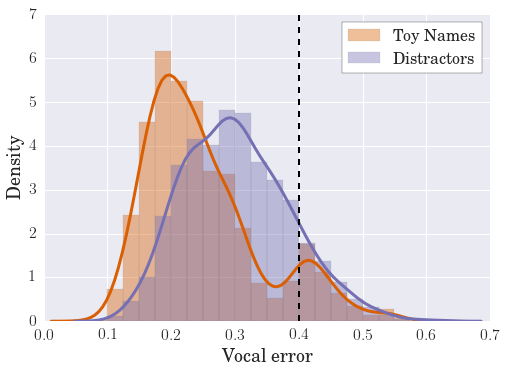

In [10]:
import seaborn as sns
from scipy import stats
import numpy as np


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

sns.distplot([ee[-1] for ee in ee_list_s], bins=np.arange(0., 0.6, 0.025), color=colors[1], hist_kws={'edgecolor':'gray'}, kde_kws={"lw":3}, label="Toy Names")
sns.distplot([ee[-1] for ee in ee_list_ns], bins=np.arange(0., 0.6, 0.025), color=colors[2], hist_kws={'edgecolor':'gray'}, kde_kws={"lw":3}, label="Distractors")
legend = plt.legend(frameon=True, fontsize=16)
plt.xlabel("Vocal error", fontsize=18)
plt.ylabel("Density", fontsize=18)
plt.plot((0.4, 0.4), (0, 7), 'k--', lw=2)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

frame = legend.get_frame()
frame.set_facecolor('1.')
frame.set_edgecolor('0.')

print "Data points:", len(ee_list_s), "per condition"

plt.savefig('../figs/fig_vocal_errors_distribution.pdf', format='pdf', bbox_inches='tight')

In [11]:
# STATS
import scipy

data1 = [ee[-1] for ee in ee_list_s]
data2 = [ee[-1] for ee in ee_list_ns]

z, p = scipy.stats.mannwhitneyu(data1, data2)
p_value = p * 2
print p_value

1.38703353668e-73
